# M.L.B SQL Database Design and Creation

## The Data

The main CSV file we will be working on is game_log.csv, a CSV file of baseball game statistics that is created by combining several seperate CSV files from [Retrosheet](https://www.retrosheet.org/). We will also be working with three other csv files that will aid us in creating the SQLite Database from the main CSV file.

## Project Goal

The main goal of this project is to practice transforming CSV data into an easy to work with SQLite database.

## Setting the Environment

In [1]:
import pandas as pd
import numpy as np
import sqlite3

## Data Exploration

In [2]:
pd.set_option('max_columns', 180)
pd.set_option('max_colwidth', 5000)

In [3]:
game_log_df = pd.read_csv("game_log.csv", low_memory=False)
park_codes_df = pd.read_csv("park_codes.csv", low_memory=False)
person_codes_df = pd.read_csv("person_codes.csv", low_memory=False)
team_codes_df = pd.read_csv("team_codes.csv", low_memory=False)
appearance_type_df = pd.read_csv("appearance_type.csv", low_memory=False)

In [4]:
game_log_df

,date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,h_score,length_outs,day_night,completion,forefeit,protest,park_id,attendance,length_minutes,v_line_score,h_line_score,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies,v_hit_by_pitch,v_walks,v_intentional_walks,v_strikeouts,v_stolen_bases,v_caught_stealing,v_grounded_into_double,v_first_catcher_interference,v_left_on_base,v_pitchers_used,v_individual_earned_runs,v_team_earned_runs,v_wild_pitches,v_balks,v_putouts,v_assists,v_errors,v_passed_balls,v_double_plays,v_triple_plays,h_at_bats,h_hits,h_doubles,h_triples,h_homeruns,h_rbi,h_sacrifice_hits,h_sacrifice_flies,h_hit_by_pitch,h_walks,h_intentional_walks,h_strikeouts,h_stolen_bases,h_caught_stealing,h_grounded_into_double,h_first_catcher_interference,h_left_on_base,h_pitchers_used,h_individual_earned_runs,h_team_earned_runs,h_wild_pitches,h_balks,h_putouts,h_assists,h_errors,h_passed_balls,h_double_plays,h_triple_plays,hp_umpire_id,hp_umpire_name,1b_umpire_id,1b_umpire_name,2b_umpire_id,2b_umpire_name,3b_umpire_id,3b_umpire_name,lf_umpire_id,lf_umpire_name,rf_umpire_id,rf_umpire_name,v_manager_id,v_manager_name,h_manager_id,h_manager_name,winning_pitcher_id,winning_pitcher_name,losing_pitcher_id,losing_pitcher_name,saving_pitcher_id,saving_pitcher_name,winning_rbi_batter_id,winning_rbi_batter_id_name,v_starting_pitcher_id,v_starting_pitcher_name,h_starting_pitcher_id,h_starting_pitcher_name,v_player_1_id,v_player_1_name,v_player_1_def_pos,v_player_2_id,v_player_2_name,v_player_2_def_pos,v_player_3_id,v_player_3_name,v_player_3_def_pos,v_player_4_id,v_player_4_name,v_player_4_def_pos,v_player_5_id,v_player_5_name,v_player_5_def_pos,v_player_6_id,v_player_6_name,v_player_6_def_pos,v_player_7_id,v_player_7_name,v_player_7_def_pos,v_player_8_id,v_player_8_name,v_player_8_def_pos,v_player_9_id,v_player_9_name,v_player_9_def_pos,h_player_1_id,h_player_1_name,h_player_1_def_pos,h_player_2_id,h_player_2_name,h_player_2_def_pos,h_player_3_id,h_player_3_name,h_player_3_def_pos,h_player_4_id,h_player_4_name,h_player_4_def_pos,h_player_5_id,h_player_5_name,h_player_5_def_pos,h_player_6_id,h_player_6_name,h_player_6_def_pos,h_player_7_id,h_player_7_name,h_player_7_def_pos,h_player_8_id,h_player_8_name,h_player_8_def_pos,h_player_9_id,h_player_9_name,h_player_9_def_pos,additional_info,acquisition_info
0,18710504,0,Thu,CL1,NaN,1,FW1,NaN,1,0,2,54.0,D,NaN,NaN,NaN,FOR01,200.0,120.0,000000000,010010000,30.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,6.0,1.0,NaN,-1.0,NaN,4.0,1.0,1.0,1.0,0.0,0.0,27.0,9.0,0.0,3.0,0.0,0.0,31.0,4.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,NaN,-1.0,NaN,3.0,1.0,0.0,0.0,0.0,0.0,27.0,3.0,3.0,1.0,1.0,0.0,boakj901,John Boake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,paboc101,Charlie Pabor,lennb101,Bill Lennon,mathb101,Bobby Mathews,prata101,Al Pratt,NaN,NaN,NaN,NaN,prata101,Al Pratt,mathb101,Bobby Mathews,whitd102,Deacon White,2.0,kimbg101,Gene Kimball,4.0,paboc101,Charlie Pabor,7.0,allia101,Art Allison,8.0,white104,Elmer White,9.0,prata101,Al Pratt,1.0,sutte101,Ezra Sutton,5.0,carlj102,Jim Carleton,3.0,bassj101,John Bass,6.0,selmf101,Frank Sellman,5.0,mathb101,Bobby Mathews,1.0,foraj101,Jim Foran,3.0,goldw101,Wally Goldsmith,6.0,lennb101,Bill Lennon,2.0,caret101,Tom Carey,4.0,mince101,Ed Mincher,7.0,mcdej101,James McDermott,8.0,kellb105,Bill Kelly,9.0,NaN,Y
1,18710505,0,Fri,BS1,NaN,1,WS3,NaN,1,20,18,54.0,D,NaN,NaN,NaN,WAS01,5000.0,145.0,107000435,640113030,41.0,13.0,1.0,2.0,0.0,13.0,0.0,0.0,0.0,18.0,NaN,5.0,3.0,NaN,-1.0,NaN,12.0,1.0,6.0,6.0,1.0,0.0,27.0,13.0,10.0,1.0,2.0,0.0,49.0,14.0,2.0,0.0,0.0,11.0,0.0,0.0,0.0,10.0,NaN,2.0,1.0,NaN,-1.0,NaN,14.0,1.0,7.0,7.0,0.0,0.0,27.0,20.0,10.0,2.0,3.0,0.0,dobsh901,Henry Dobson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wrigh101,Harry Wright,younn801,Nick Young,spala101,Al Spalding,braia102,Asa Brainard,NaN,NaN,NaN,NaN,spala101,Al Spalding,braia102,Asa Brainard,wrigg101,George Wright,6.0,barnr102,Ross

The game_log.csv consist of baseball games from the 1800s to 2016. Each row represents the stastistic of a game on a particular date.

In [5]:
park_codes_df

,park_id,name,aka,city,state,start,end,league,notes
0,ALB01,Riverside Park,NaN,Albany,NY,09/11/1880,05/30/1882,NL,TRN:9/11/80;6/15&9/10/1881;5/16-5/18&5/30/1882
1,ALT01,Columbia Park,NaN,Altoona,PA,04/30/1884,05/31/1884,UA,NaN
2,ANA01,Angel Stadium of Anaheim,Edison Field; Anaheim Stadium,Anaheim,CA,04/19/1966,NaN,AL,NaN
3,ARL01,Arlington Stadium,NaN,Arlington,TX,04/21/1972,10/03/1993,AL,NaN
4,ARL02,Rangers Ballpark in Arlington,The Ballpark in Arlington; Ameriquest Fl,Arlington,TX,04/11/1994,NaN,AL,NaN
5,ATL01,Atlanta-Fulton County Stadium,NaN,Atlanta,GA,04/12/1966,09/23/1996,NL,NaN
6,ATL02,Turner Field,NaN,Atlanta,GA,04/04/1997,10/02/2016,NL,NaN
7,ATL03,Suntrust Park,NaN,Atlanta,GA,04/14/2017,NaN,NL,NaN
8,BAL01,Madison Avenue Grounds,NaN,Baltimore,MD,07/08/1871,07/08/1871,NaN,WS3
9,BAL02,Newington Park,NaN,Baltimore,MD,04/22/1872,09/30/1882,NaN,BL1:1872-74; BL4:1873; BL2: 1882


This dataset tells us more about the park the game takes place at. The start, end, and league data columns doesn't seem to make sense to be in a basbeball park dataset. These columns make more sense to be in the team_codes_df, so this is something we have to keep in mind when normalizing the database.

In [6]:
person_codes_df

,id,last,first,player_debut,mgr_debut,coach_debut,ump_debut
0,aardd001,Aardsma,David,04/06/2004,NaN,NaN,NaN
1,aaroh101,Aaron,Hank,04/13/1954,NaN,NaN,NaN
2,aarot101,Aaron,Tommie,04/10/1962,NaN,04/06/1979,NaN
3,aased001,Aase,Don,07/26/1977,NaN,NaN,NaN
4,abada001,Abad,Andy,09/10/2001,NaN,NaN,NaN
5,abadf001,Abad,Fernando,07/28/2010,NaN,NaN,NaN
6,abadj101,Abadie,John,04/26/1875,NaN,NaN,NaN
7,abbae101,Abbaticchio,Ed,09/04/1897,NaN,NaN,NaN
8,abbeb101,Abbey,Bert,06/14/1892,NaN,NaN,NaN
9,abbec101,Abbey,Charlie,08/16/1893,NaN,NaN,07/21/1897


This dataset gives us information on the player's full name and their debut date. This information also gives information of managers, coaches, and umpire.I might dtop the information on the coach since that is something we don't have in the game-log data.

In [7]:
team_codes_df

,team_id,league,start,end,city,nickname,franch_id,seq
0,ALT,UA,1884,1884,Altoona,Mountain Cities,ALT,1
1,ARI,NL,1998,0,Arizona,Diamondbacks,ARI,1
2,BFN,NL,1879,1885,Buffalo,Bisons,BFN,1
3,BFP,PL,1890,1890,Buffalo,Bisons,BFP,1
4,BL1,NaN,1872,1874,Baltimore,Canaries,BL1,1
5,BL2,AA,1882,1891,Baltimore,Orioles,BL2,1
6,BLN,NL,1892,1899,Baltimore,Orioles,BL2,2
7,BL4,NaN,1873,1873,Baltimore,Marylands,BL4,1
8,BLA,AL,1901,1902,Baltimore,Orioles,BLA,1
9,NYA,AL,1903,0,New York,Yankees,BLA,2


Because the team_codes_df gives the league, start, and end column, we can get rid of those columns in the park_codes_df to prevent redudant data. Another thing is that the end date for some baseball team are 0. After doing a quick search on some teams that have an end date of 0, the teams with end date of 0 are still playing today. This is something we have to note if we want to maybe look at the distribution of the dates.

In [8]:
appearance_type_df

,appearance_type_id,name,category
0,O1,Batter 1,offense
1,O2,Batter 2,offense
2,O3,Batter 3,offense
3,O4,Batter 4,offense
4,O5,Batter 5,offense
5,O6,Batter 6,offense
6,O7,Batter 7,offense
7,O8,Batter 8,offense
8,O9,Batter 9,offense
9,D1,Pitcher,defense


This a spreadsheet that provides the id for each type of people in a baseball game. We can probably use the id as a primary key to connect to the game_log table to provide more information on each id.

## Creating SQLite Tables

### Creating Helper Functions

In [9]:
# returns a pandas dataframe of the query from a specified database
def run_query(query, database):
    with sqlite3.connect(database) as conn:
        return pd.read_sql(query, conn)

In [10]:
# runs a SQL statment on a sepcified database
def run_command(statement, database):
    with sqlite3.connect(database) as conn:
        # conn.isolation_level tells SQLite to autocommit any changes
        conn.isolation_level = None
        conn.execute(statement)

run_command is a function that runs a sql query that modifies the database and/or tables in the database. run_command modifies while run_query function returns something. A run_query function does not modify the current database and/or table. For example, you would use the run_query function to retrieve something from a table and you would use a run_command function to drop a table from the database.

In [11]:
# returns a list of all tables and views in the database
def show_tables(database):
    query = """
        SELECT
            name,
            type
        FROM sqlite_master
        WHERE type in ('table', 'view');
    """
    return run_query(query, database)

show_table is a function that shows the current table in the database.

### Creating the table

In [12]:
# the database name
mlb_db = "mlb.db"

# adding the tables to the database
with sqlite3.connect(mlb_db) as conn:
    game_log_df.to_sql(name = "game_log", con = conn, 
                       if_exists = 'replace', index = False)
    park_codes_df.to_sql(name = "park_codes", con = conn, 
                       if_exists = 'replace', index = False)
    person_codes_df.to_sql(name = "person_codes", con = conn, 
                       if_exists = 'replace', index = False)
    team_codes_df.to_sql(name = "team_codes", con = conn, 
                       if_exists = 'replace', index = False)
    appearance_type_df.to_sql(name = "appearance_type", con = conn,
                       if_exists = 'replace', index = False)
show_tables(mlb_db)

,name,type
0,person_code,table
1,park_code,table
2,game_stat,table
3,person_type,table
4,league_type,table
5,team_code,table
6,game_info,table
7,person_in_game,table
8,game_log,table
9,park_codes,table


The five dataset are converted to sql tables so we can use them later on when we are normalizing our database

### Creating the Primary Key

To have a normalized database or to organize it, we need a column for the primary key for each table. A primary key is a constraint that uniquely identifies each record in a table, and each value must be unique and cannot contain NaN values. 

We could have the primary key to consist of multiple column or only one integer primary key column, but we will check through [RETROSHEET](www.retrosheet.org) to see if it has a convention to uniquely identify each game. It turns out RETROSHEET does have a way of uniquely identifying each game, and it can be found [here](https://www.retrosheet.org/eventfile.htm). The identifier is a 12 character ID which identifis the date, hometeam, and number of the game. 

EX: ATL198304080. The first three characters identifies the team's id, the next four identifies the year of the game, the next two identifies the month, the next two identifies the day, and the last digit identifies the game type: 0 - single game, 1 - first game, and 2 - second game. 

In [13]:
# adding a new column to the game_log table
game_id_statement = """
    ALTER TABLE game_log
    ADD game_id TEXT;
"""

# inserting values into the game_id column
insert_game_id_statement = """
    UPDATE game_log
    SET game_id = h_name || date || number_of_game;
"""

run_command(game_id_statement, mlb_db)
run_command(insert_game_id_statement, mlb_db)

In [14]:
run_query("SELECT game_id from game_log", mlb_db)

,game_id
0,FW1187105040
1,WS3187105050
2,RC1187105060
3,CH1187105080
4,TRO187105090
5,CL1187105110
6,CL1187105130
7,FW1187105130
8,FW1187105150
9,BS1187105160


## Data Normalization

### Schema Building

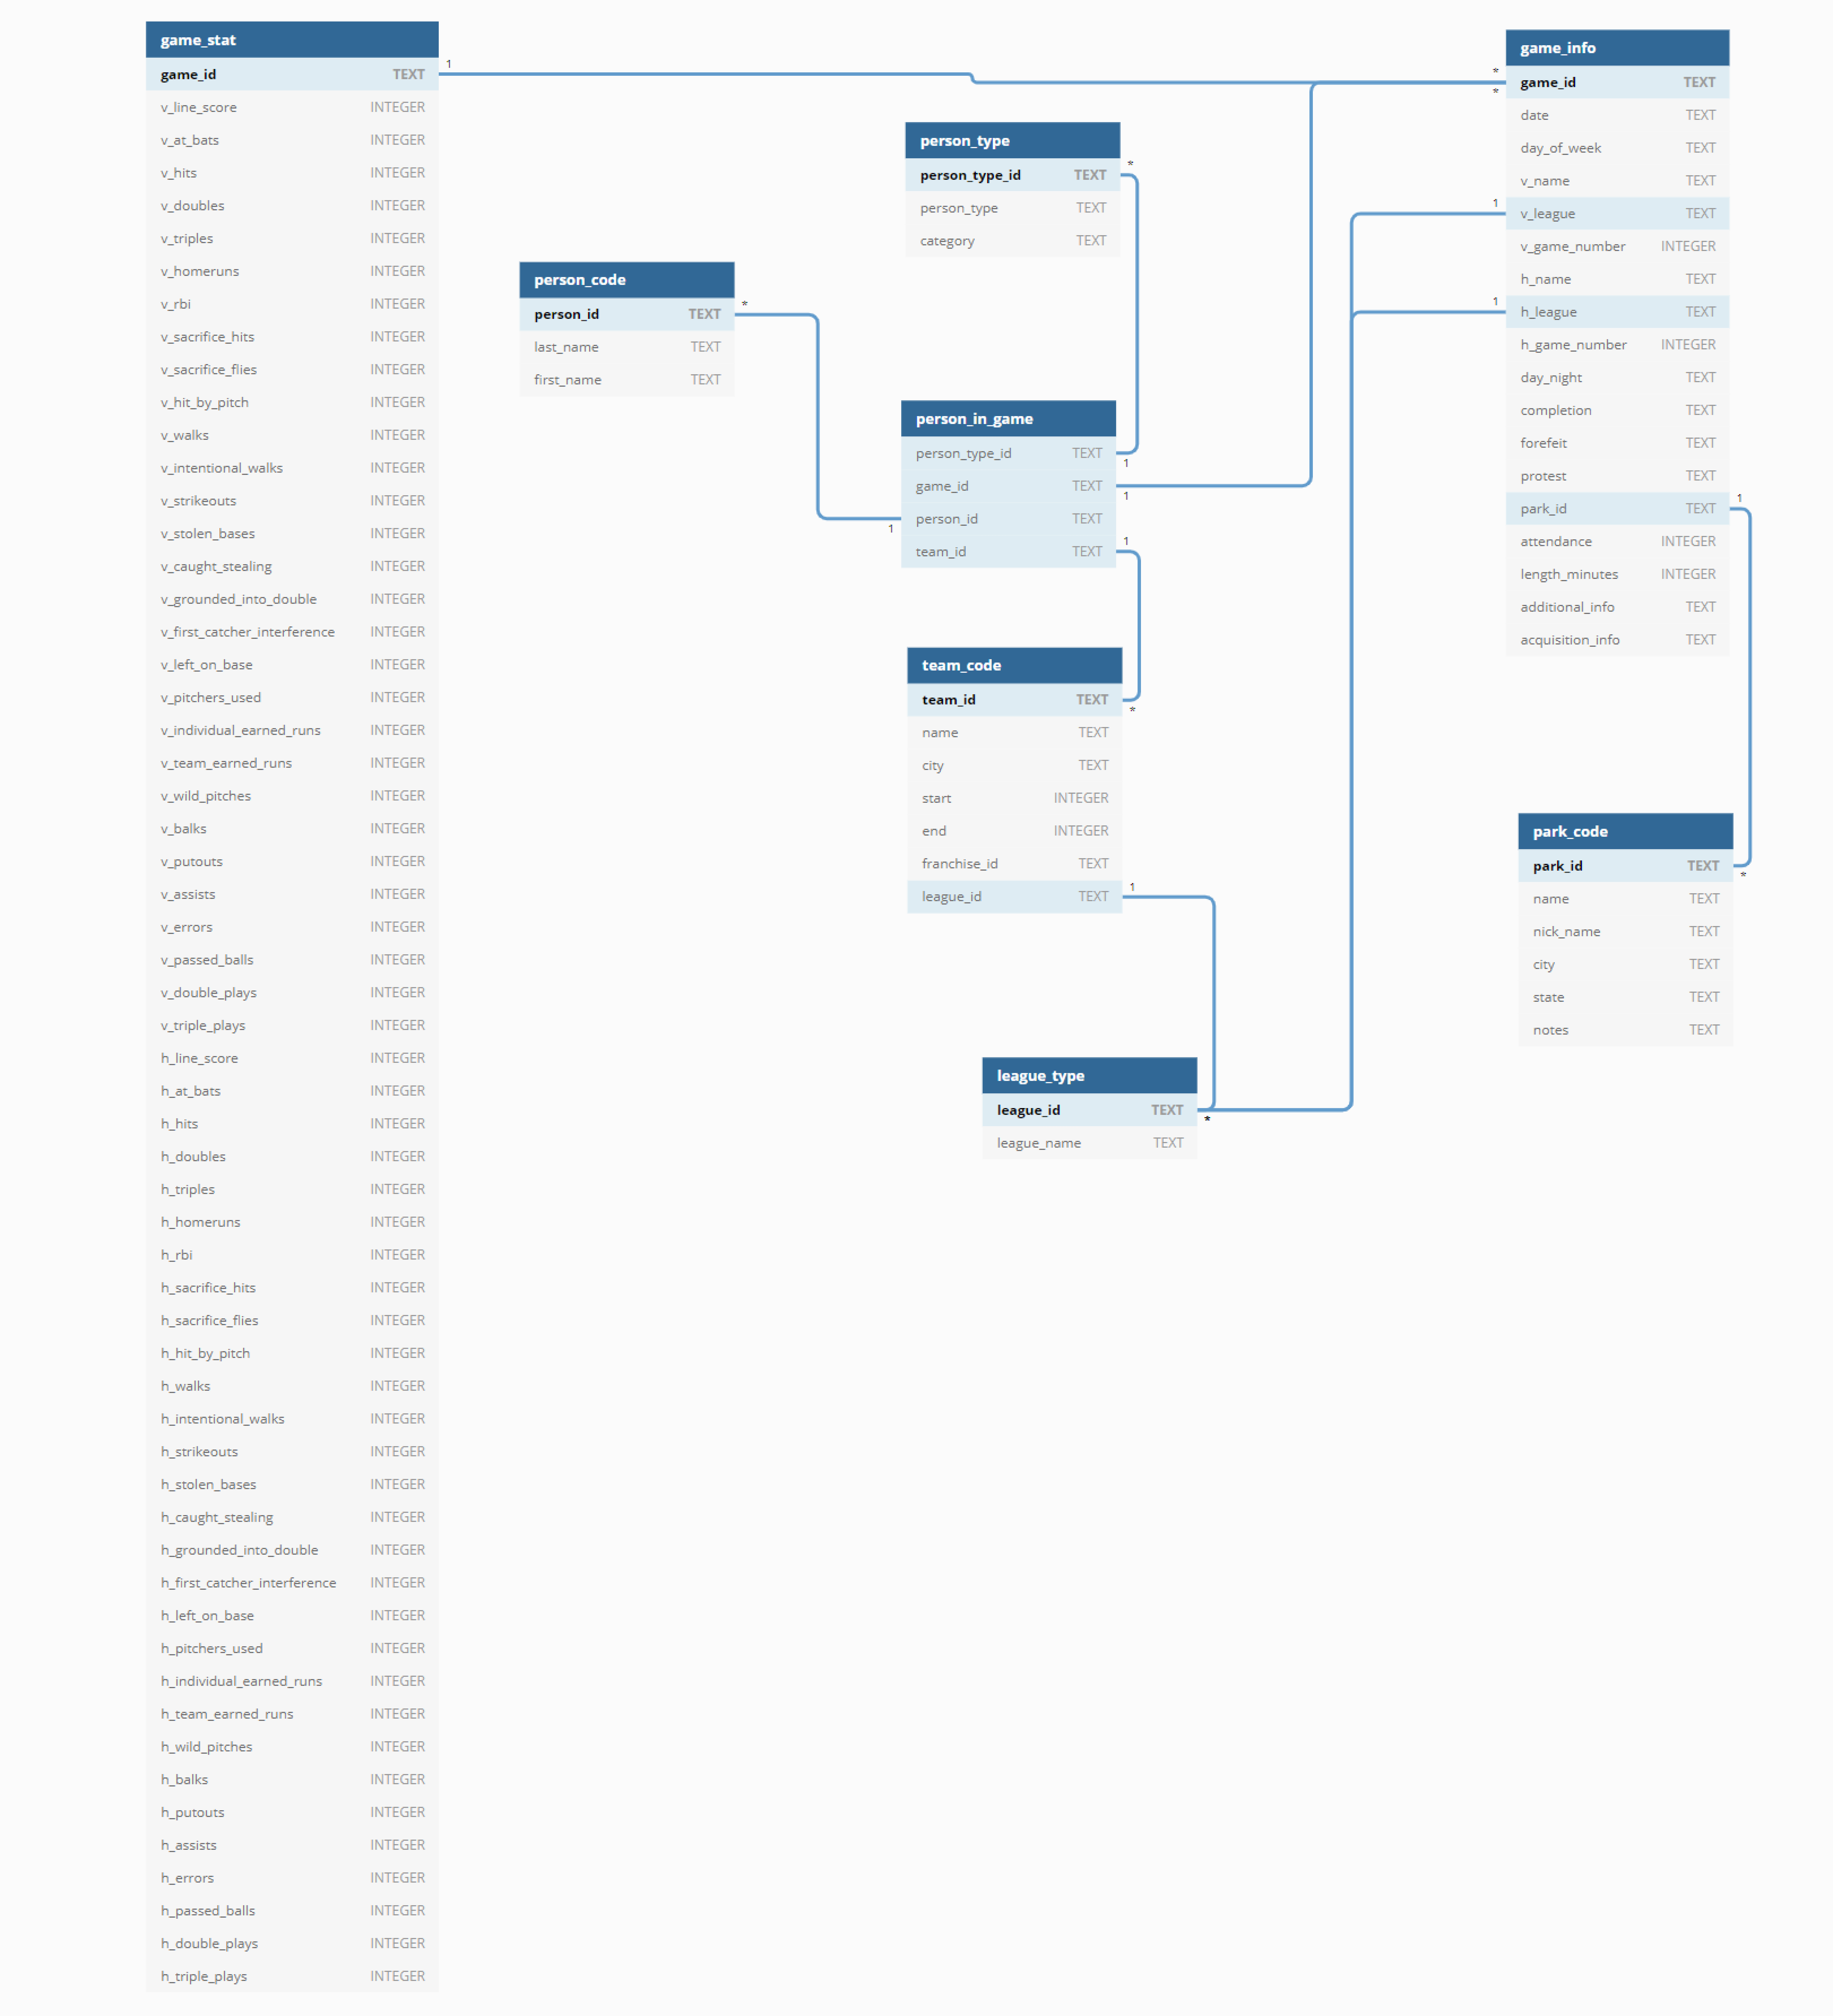

### Explanation

Although game_log is a comprehensive table of each baseball game, the table could be split into three parts to increase readability and organization. I noticed that the table consist of the baseball game's stats like number of homeruns and walks, the baseball game's information like the date and length of games, and the player's information. Because I want each table in my SQL database to be tailored to a specific thing, I seperated the game_log into two tables, game_stat and game_info. I moved the player's info to a table called player_in_game.  You can think of the game_info table as the table of content page of a play, the game_stats table can be thought as the story of the play, and the player_in_game table can be thought as the list of characters in the play. (This isn't exactly how a play is written, but this is the best example that I can come up with that makes sense to me.)

I dropped the debut dates in the person_code table because the dates can be found in the game_log table. It only consist of the first and last name of the player and it connects to the person_in_game table. 

Person_in_game is a table I created to keep track of all the players in each game. This table only consist of four id that are game_id, person_type_id, person_id, and team_id. These id can be used to find more information by looking in each of their respective table(person_code, person_type, game_info, and team_code)

Instead of keeping all the type of players, managers, umpires, and coaches in the person_in_game table, I created a seperate table called person_type just for the type of people in the game. This simplifies the player data and increases the readability.

For the park_code table, the start and end dates are removed as that can be found in the game_log dataset. We got rid of the league column because the league of the park doesn't really tell us anything important. Plus, the league table can be found in the team_code table and league table.

There's no change to the team_code data. The league table was built to have the league of the teams to be more accessible.


## Table Building

### person_type table

In [15]:
# person_type table
person_type_s = """
    CREATE TABLE IF NOT EXISTS person_type (
        person_type_id TEXT PRIMARY KEY,
        person_type TEXT 
        category TEXT
    );
"""

# fill the table with data
person_type_fill_s = """
    INSERT OR IGNORE INTO person_type
    SELECT
        appearance_type_id person_type_id,
        name person_type,
        category
    FROM appearance_type;      
"""

run_command(person_type_s, mlb_db)
run_command(person_type_fill_s, mlb_db)
run_query("SELECT * FROM person_type", mlb_db)

,appearance_type_id,name,category
0,O1,Batter 1,offense
1,O2,Batter 2,offense
2,O3,Batter 3,offense
3,O4,Batter 4,offense
4,O5,Batter 5,offense
5,O6,Batter 6,offense
6,O7,Batter 7,offense
7,O8,Batter 8,offense
8,O9,Batter 9,offense
9,D1,Pitcher,defense


### person_code table

In [16]:
# person_code
person_code_s = """
    CREATE TABLE IF NOT EXISTS person_code (
        person_id TEXT PRIMARY KEY,
        last_name TEXT,
        first_name TEXT
    );
"""

# fill the table with data
person_code_f_s = """
    INSERT OR IGNORE INTO person_code
    SELECT
        id person_id,
        last last_name,
        first first_name
    FROM person_codes;
"""

run_command(person_code_s, mlb_db)
run_command(person_code_f_s, mlb_db)
run_query("SELECT * FROM person_code", mlb_db)

,person_id,last_name,first_name
0,aardd001,Aardsma,David
1,aaroh101,Aaron,Hank
2,aarot101,Aaron,Tommie
3,aased001,Aase,Don
4,abada001,Abad,Andy
5,abadf001,Abad,Fernando
6,abadj101,Abadie,John
7,abbae101,Abbaticchio,Ed
8,abbeb101,Abbey,Bert
9,abbec101,Abbey,Charlie


### league_type table

In [17]:
team_codes_df["league"].unique()

array(['UA', 'NL', 'PL', nan, 'AA', 'AL', 'FL'], dtype=object)

We see that there is 6 unique league id. Doing some quick google search, we found what each league stands for. 

UA - UNION ASSOCIATION

NL - NATIONAL LEAGUE

PL - PLAYER'S LEAGUE

AA - DOUBLE A (HIGHEST MINOR LEAGUE)

AL - AMERICAN LEAGUE

FL - FLORIDA STATE LEAGUE

In [18]:
# league_df
league_d = {'league_id': ['UA', 'NL', 'PL', 'AA', 'AL', 'FL'],
            'league_name': ['DOUBLE A (HIGHEST MINOR LEAGUE)', 'AMERICAN LEAGUE', 'FLORIDA STATE LEAGUE',
                            'NATIONAL LEAGUE', 'PLAYER\'S LEAGUE', 'UNION ASSOCIATION']}
league_df = pd.DataFrame(data = league_d)
league_df

,league_id,league_name
0,UA,DOUBLE A (HIGHEST MINOR LEAGUE)
1,NL,AMERICAN LEAGUE
2,PL,FLORIDA STATE LEAGUE
3,AA,NATIONAL LEAGUE
4,AL,PLAYER'S LEAGUE
5,FL,UNION ASSOCIATION


In [19]:
# league_df to sql
league = league_df.to_sql(name = "league", con = conn,
                    if_exists = 'replace', index = False)

# league_type table
league_type_s = """
    CREATE TABLE IF NOT EXISTS league_type (
        league_id TEXT PRIMARY KEY,
        league_name TEXT
    )
"""

# fill the league_type table
league_type_f_s = """
    INSERT OR IGNORE INTO league_type
    SELECT * FROM league;
"""

run_command(league_type_s, mlb_db)
run_command(league_type_f_s, mlb_db)
run_query("SELECT * FROM league_type", mlb_db)

,league_id,league_name
0,UA,DOUBLE A (HIGHEST MINOR LEAGUE)
1,NL,AMERICAN LEAGUE
2,PL,FLORIDA STATE LEAGUE
3,AA,NATIONAL LEAGUE
4,AL,PLAYER'S LEAGUE
5,FL,UNION ASSOCIATION


### park_code table

In [20]:
# park_code table
park_code_s = """
    CREATE TABLE IF NOT EXISTS park_code (
        park_id TEXT PRIMARY KEY,
        name TEXT,
        nick_name TEXT,
        city TEXT,
        state TEXT, 
        notes TEXT
    );
"""

# filling in the park_code table
park_code_f_s = """
    INSERT OR IGNORE INTO park_code
    SELECT
        park_id,
        name,
        aka nick_name,
        city,
        state,
        notes
    FROM park_codes
"""

run_command(park_code_s, mlb_db)
run_command(park_code_f_s, mlb_db)
run_query("SELECT * FROM park_code", mlb_db)

,park_id,name,nick_name,city,state,notes
0,ALB01,Riverside Park,None,Albany,NY,TRN:9/11/80;6/15&9/10/1881;5/16-5/18&5/30/1882
1,ALT01,Columbia Park,None,Altoona,PA,None
2,ANA01,Angel Stadium of Anaheim,Edison Field; Anaheim Stadium,Anaheim,CA,None
3,ARL01,Arlington Stadium,None,Arlington,TX,None
4,ARL02,Rangers Ballpark in Arlington,The Ballpark in Arlington; Ameriquest Fl,Arlington,TX,None
5,ATL01,Atlanta-Fulton County Stadium,None,Atlanta,GA,None
6,ATL02,Turner Field,None,Atlanta,GA,None
7,ATL03,Suntrust Park,None,Atlanta,GA,None
8,BAL01,Madison Avenue Grounds,None,Baltimore,MD,WS3
9,BAL02,Newington Park,None,Baltimore,MD,BL1:1872-74; BL4:1873; BL2: 1882


### team_code table

In [21]:
# team_code table
team_code_s = """
    CREATE TABLE IF NOT EXISTS team_code (
        team_id TEXT PRIMARY KEY,
        name TEXT,
        city TEXT,
        start INTEGER,
        end INTEGER,
        franchise_id TEXT,
        league_id,
        FOREIGN KEY (league_id) REFERENCES league_type(league_id)
    );
"""

team_code_f_s = """
    INSERT OR IGNORE INTO team_code
    SELECT
        team_id,
        nickname name,
        city,
        start,
        end,
        franch_id francise_id,
        league league_id
    FROM team_codes;
"""

run_command(team_code_s, mlb_db)
run_command(team_code_f_s, mlb_db)
run_query("SELECT * FROM team_code", mlb_db)

,team_id,name,city,start,end,franchise_id,league_id
0,ALT,Mountain Cities,Altoona,1884,1884,ALT,UA
1,ARI,Diamondbacks,Arizona,1998,0,ARI,NL
2,BFN,Bisons,Buffalo,1879,1885,BFN,NL
3,BFP,Bisons,Buffalo,1890,1890,BFP,PL
4,BL1,Canaries,Baltimore,1872,1874,BL1,None
5,BL2,Orioles,Baltimore,1882,1891,BL2,AA
6,BLN,Orioles,Baltimore,1892,1899,BL2,NL
7,BL4,Marylands,Baltimore,1873,1873,BL4,None
8,BLA,Orioles,Baltimore,1901,1902,BLA,AL
9,NYA,Yankees,New York,1903,0,BLA,AL


### game_info table

In [22]:
# game_info table
game_info_s = """
    CREATE TABLE IF NOT EXISTS game_info (
        game_id TEXT PRIMARY KEY,
        date TEXT,
        day_of_week TEXT,
        v_name TEXT,
        v_league TEXT,
        v_game_number INTEGER,
        h_name TEXT,
        h_league TEXT,
        h_game_number INTEGER,
        day_night TEXT,
        completion TEXT,
        forefeit TEXT,
        protest TEXT,
        park_id TEXT,
        attendance INTEGER,
        length_minutes INTEGER,
        additional_info TEXT,
        acquisition_info TEXT,
        FOREIGN KEY (park_id) REFERENCES park_code(park_id),
        FOREIGN KEY (v_league) REFERENCES league_type(league_id),
        FOREIGN KEY (h_league) REFERENCES league_type(league_id)
    )
"""

# fill the game_info table
game_info_f_s = """
    INSERT OR IGNORE INTO game_info
    SELECT
        game_id,
        date,
        day_of_week,
        v_name,
        v_league,
        v_game_number,
        h_name,
        h_league,
        h_game_number,
        day_night,
        completion,
        forefeit,
        protest,
        park_id,
        attendance,
        length_minutes,
        additional_info,
        acquisition_info
    FROM game_log;
"""

run_command(game_info_s, mlb_db)
run_command(game_info_f_s, mlb_db)
run_query("SELECT * FROM game_info", mlb_db)

,game_id,date,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,day_night,completion,forefeit,protest,park_id,attendance,length_minutes,additional_info,acquisition_info
0,FW1187105040,18710504,Thu,CL1,None,1,FW1,None,1,D,None,None,None,FOR01,200.0,120.0,None,Y
1,WS3187105050,18710505,Fri,BS1,None,1,WS3,None,1,D,None,None,None,WAS01,5000.0,145.0,HTBF,Y
2,RC1187105060,18710506,Sat,CL1,None,2,RC1,None,1,D,None,None,None,RCK01,1000.0,140.0,None,Y
3,CH1187105080,18710508,Mon,CL1,None,3,CH1,None,1,D,None,None,None,CHI01,5000.0,150.0,None,Y
4,TRO187105090,18710509,Tue,BS1,None,2,TRO,None,1,D,None,None,None,TRO01,3250.0,145.0,HTBF,Y
5,CL1187105110,18710511,Thu,CH1,None,2,CL1,None,4,D,None,V,None,CLE01,2500.0,120.0,None,Y
6,CL1187105130,18710513,Sat,WS3,None,2,CL1,None,5,D,None,None,None,CIN01,1200.0,150.0,None,Y
7,FW1187105130,18710513,Sat,CH1,None,3,FW1,None,2,D,None,None,None,FOR01,1500.0,105.0,None,Y
8,FW1187105150,18710515,Mon,WS3,None,3,FW1,None,3,D,None,None,None,FOR01,NaN,140.0,None,Y
9,BS1187105160,18710516,Tue,TRO,None,2,BS1,None,3,D,None,None,None,BOS01,2500.0,NaN,HTBF,Y


### game_stat table

In [23]:
# game_stat table
game_stat_s = """
    CREATE TABLE IF NOT EXISTS game_stat (
        game_id TEXT PRIMARY KEY,
        v_line_score INTEGER,
        v_at_bats INTEGER,
        v_hits INTEGER,
        v_doubles INTEGER,
        v_triples INTEGER,
        v_homeruns INTEGER,
        v_rbi INTEGER,
        v_sacrifice_hits INTEGER,
        v_sacrifice_flies INTEGER,
        v_hit_by_pitch INTEGER,
        v_walks INTEGER,
        v_intentional_walks INTEGER,
        v_strikeouts INTEGER,
        v_stolen_bases INTEGER,
        v_caught_stealing INTEGER,
        v_grounded_into_double INTEGER,
        v_first_catcher_interference INTEGER,
        v_left_on_base INTEGER,
        v_pitchers_used INTEGER,
        v_individual_earned_runs INTEGER,
        v_team_earned_runs INTEGER,
        v_wild_pitches INTEGER,
        v_balks INTEGER,
        v_putouts INTEGER,
        v_assists INTEGER,
        v_errors INTEGER,
        v_passed_balls INTEGER,
        v_double_plays INTEGER,
        v_triple_plays INTEGER,
        h_line_score INTEGER,
        h_at_bats INTEGER,
        h_hits INTEGER,
        h_doubles INTEGER,
        h_triples INTEGER,
        h_homeruns INTEGER,
        h_rbi INTEGER,
        h_sacrifice_hits INTEGER,
        h_sacrifice_flies INTEGER,
        h_hit_by_pitch INTEGER,
        h_walks INTEGER,
        h_intentional_walks INTEGER,
        h_strikeouts INTEGER,
        h_stolen_bases INTEGER,
        h_caught_stealing INTEGER,
        h_grounded_into_double INTEGER,
        h_first_catcher_interference INTEGER,
        h_left_on_base INTEGER,
        h_pitchers_used INTEGER,
        h_individual_earned_runs INTEGER,
        h_team_earned_runs INTEGER,
        h_wild_pitches INTEGER,
        h_balks INTEGER,
        h_putouts INTEGER,
        h_assists INTEGER,
        h_errors INTEGER,
        h_passed_balls INTEGER,
        h_double_plays INTEGER,
        h_triple_plays INTEGER,
        FOREIGN KEY (game_id) REFERENCES game_info(game_id)
    );
"""

# to fill the game_stat table
game_stat_f_s = """
    INSERT OR IGNORE INTO game_stat
    SELECT
        game_id,
        v_line_score,
        v_at_bats,
        v_hits,
        v_doubles,
        v_triples,
        v_homeruns,
        v_rbi,
        v_sacrifice_hits,
        v_sacrifice_flies,
        v_hit_by_pitch,
        v_walks,
        v_intentional_walks,
        v_strikeouts,
        v_stolen_bases,
        v_caught_stealing,
        v_grounded_into_double,
        v_first_catcher_interference,
        v_left_on_base,
        v_pitchers_used,
        v_individual_earned_runs,
        v_team_earned_runs,
        v_wild_pitches,
        v_balks,
        v_putouts,
        v_assists,
        v_errors,
        v_passed_balls,
        v_double_plays,
        v_triple_plays,
        h_line_score,
        h_at_bats,
        h_hits,
        h_doubles,
        h_triples,
        h_homeruns,
        h_rbi,
        h_sacrifice_hits,
        h_sacrifice_flies,
        h_hit_by_pitch,
        h_walks,
        h_intentional_walks,
        h_strikeouts,
        h_stolen_bases,
        h_caught_stealing,
        h_grounded_into_double,
        h_first_catcher_interference,
        h_left_on_base,
        h_pitchers_used,
        h_individual_earned_runs,
        h_team_earned_runs,
        h_wild_pitches,
        h_balks,
        h_putouts,
        h_assists,
        h_errors,
        h_passed_balls,
        h_double_plays,
        h_triple_plays
    FROM game_log;
"""

run_command(game_stat_s, mlb_db)
run_command(game_stat_f_s, mlb_db)
run_query("SELECT * FROM game_stat", mlb_db)

,game_id,v_line_score,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies,v_hit_by_pitch,v_walks,v_intentional_walks,v_strikeouts,v_stolen_bases,v_caught_stealing,v_grounded_into_double,v_first_catcher_interference,v_left_on_base,v_pitchers_used,v_individual_earned_runs,v_team_earned_runs,v_wild_pitches,v_balks,v_putouts,v_assists,v_errors,v_passed_balls,v_double_plays,v_triple_plays,h_line_score,h_at_bats,h_hits,h_doubles,h_triples,h_homeruns,h_rbi,h_sacrifice_hits,h_sacrifice_flies,h_hit_by_pitch,h_walks,h_intentional_walks,h_strikeouts,h_stolen_bases,h_caught_stealing,h_grounded_into_double,h_first_catcher_interference,h_left_on_base,h_pitchers_used,h_individual_earned_runs,h_team_earned_runs,h_wild_pitches,h_balks,h_putouts,h_assists,h_errors,h_passed_balls,h_double_plays,h_triple_plays
0,FW1187105040,0,30.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,6.0,1.0,NaN,-1.0,NaN,4.0,1.0,1.0,1.0,0.0,0.0,27.0,9.0,0.0,3.0,0.0,0.0,10010000,31.0,4.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,NaN,-1.0,NaN,3.0,1.0,0.0,0.0,0.0,0.0,27.0,3.0,3.0,1.0,1.0,0.0
1,WS3187105050,107000435,41.0,13.0,1.0,2.0,0.0,13.0,0.0,0.0,0.0,18.0,NaN,5.0,3.0,NaN,-1.0,NaN,12.0,1.0,6.0,6.0,1.0,0.0,27.0,13.0,10.0,1.0,2.0,0.0,640113030,49.0,14.0,2.0,0.0,0.0,11.0,0.0,0.0,0.0,10.0,NaN,2.0,1.0,NaN,-1.0,NaN,14.0,1.0,7.0,7.0,0.0,0.0,27.0,20.0,10.0,2.0,3.0,0.0
2,RC1187105060,610020003,49.0,11.0,1.0,1.0,0.0,8.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,NaN,-1.0,NaN,10.0,1.0,0.0,0.0,2.0,0.0,27.0,12.0,8.0,5.0,0.0,0.0,10020100,36.0,7.0,2.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,NaN,3.0,5.0,NaN,-1.0,NaN,5.0,1.0,3.0,3.0,1.0,0.0,27.0,12.0,13.0,3.0,0.0,0.0
3,CH1187105080,101403111,46.0,15.0,2.0,1.0,2.0,10.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,NaN,-1.0,NaN,7.0,1.0,6.0,6.0,0.0,0.0,27.0,15.0,11.0,6.0,0.0,0.0,77000000,43.0,11.0,2.0,0.0,0.0,8.0,0.0,0.0,0.0,4.0,NaN,2.0,1.0,NaN,-1.0,NaN,6.0,1.0,4.0,4.0,0.0,0.0,27.0,14.0,7.0,2.0,0.0,0.0
4,TRO187105090,2232,46.0,17.0,4.0,1.0,0.0,6.0,0.0,0.0,0.0,2.0,NaN,0.0,1.0,NaN,-1.0,NaN,12.0,1.0,2.0,2.0,0.0,0.0,27.0,12.0,5.0,0.0,1.0,0.0,101003000,36.0,9.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,NaN,0.0,2.0,NaN,-1.0,NaN,7.0,1.0,3.0,3.0,1.0,0.0,27.0,11.0,7.0,3.0,0.0,0.0
5,CL1187105110,12120534,41.0,15.0,1.0,3.0,3.0,10.0,0.0,0.0,0.0,8.0,NaN,1.0,0.0,NaN,-1.0,NaN,7.0,1.0,4.0,4.0,0.0,0.0,24.0,11.0,4.0,3.0,0.0,0.0,1410004,39.0,13.0,1.0,2.0,1.0,7.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,-1.0,NaN,5.0,2.0,10.0,10.0,2.0,0.0,24.0,7.0,5.0,2.0,0.0,0.0
6,CL1187105130,141020004,42.0,9.0,2.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,NaN,-1.0,NaN,4.0,1.0,2.0,2.0,0.0,0.0,27.0,9.0,6.0,3.0,1.0,0.0,4100012,39.0,11.0,1.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,NaN,-1.0,NaN,4.0,1.0,3.0,3.0,3.0,0.0,27.0,6.0,8.0,1.0,0.0,0.0
7,FW1187105130,53210012,45.0,17.0,5.0,2.0,0.0,10.0,0.0,0.0,0.0,1.0,NaN,1.0,2.0,NaN,-1.0,NaN,5.0,1.0,2.0,2.0,0.0,0.0,27.0,8.0,4.0,2.0,0.0,0.0,200002001,33.0,5.0,1.0,2.0,0.0,3.0,0.0,0.0,0.0,3.0,NaN,1.0,0.0,NaN,-1.0,NaN,4.0,1.0,6.0,6.0,0.0,0.0,27.0,8.0,7.0,3.0,0.0,0.0
8,FW1187105150,30100101,42.0,8.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,NaN,-1.0,NaN,10.0,1.0,4.0,4.0,0.0,0.0,27.0,13.0,5.0,6.0,0.0,0.0,3300123,49.0,20.0,5.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,NaN,-1.0,NaN,10.0,1.0,1.0,1.0,0.0,0.0,27.0,6.0,9.0,2.0,0.0,0.0
9,BS1187105160,302604(11)30,64.0,26.0,3.0,1.0,0.0,26.0,0.0,0.0,0.0,2.0,NaN,0.0,3.0,NaN,-1.0,NaN,10.0,1.0,4.0,4.0,0.0,0.0,27.0,11.0,8.0,3.0,3.0,0.0,610020221,43.0,13.0,3.0,0.0,0.0,9.0,0.0,0.0,0.0,4.0,NaN,1.0,3.0,NaN,-1.0,NaN,6.0,1.0,10.0,10.0,0.0,0.0,27.0,17.0,15.0,2.0,1.0,0.0


### person_in_game table

In [24]:
# person_in_game table
person_in_game_s = """
    CREATE TABLE IF NOT EXISTS person_in_game (
        person_type_id TEXT,
        game_id TEXT,
        person_id TEXT,
        team_id TEXT,
        FOREIGN KEY (person_type_id) REFERENCES person_type(person_type_id)
        FOREIGN KEY (person_id) REFERENCES person_code(person_id),
        FOREIGN KEY (team_id) REFERENCES team_code(team_id),
        FOREIGN KEY (game_id) REFERENCES game_info(game_id)
    );
"""
# fill the table with data
person_in_game_f_s = """
    INSERT OR IGNORE INTO person_in_game (
    person_type_id,
    game_id,
    person_id,
    team_id
    )
        SELECT
            "UHP",
            game_id,
            hp_umpire_id,
            NULL
        FROM game_log
        WHERE hp_umpire_id IS NOT NULL
    UNION
        SELECT
            "U1B",
            game_id,
            [1b_umpire_id],
            NULL
        FROM game_log
        WHERE "1b_umpire_id" IS NOT NULL
    UNION
        SELECT
            "U2B",
            game_id,
            [2b_umpire_id],
            NULL
        FROM game_log
        WHERE "2b_umpire_id" IS NOT NULL
    UNION
        SELECT
            "U3B",
            game_id,
            [3b_umpire_id],
            NULL
        FROM game_log
        WHERE "3b_umpire_id" IS NOT NULL
    UNION
        SELECT
            "ULF",
            game_id,
            lf_umpire_id,
            NULL
        FROM game_log
        WHERE lf_umpire_id IS NOT NULL
    UNION
        SELECT
            "URF",
            game_id,
            rf_umpire_id,
            NULL
        FROM game_log
        WHERE rf_umpire_id IS NOT NULL
    UNION
        SELECT
            "MM",
            game_id,
            v_manager_id,
            v_name
        FROM game_log
        WHERE v_manager_id IS NOT NULL
    UNION
        SELECT
            "MM",
            game_id,
            v_manager_id,
            h_name
        FROM game_log
        WHERE h_manager_id IS NOT NULL
    UNION
        SELECT
            "AWP",
            game_id,
            winning_pitcher_id,
            CASE
                WHEN v_score > h_score THEN v_name
                ELSE h_name
                END
            FROM game_log
            WHERE winning_pitcher_id IS NOT NULL
    UNION
        SELECT
            "ALP",
            game_id,
            losing_pitcher_id,
            CASE
                WHEN v_score < h_score THEN v_score
                ELSE h_score
                END
        FROM game_log
        WHERE losing_pitcher_id IS NOT NULL
    UNION
        SELECT
            "ASP",
            game_id,
            saving_pitcher_id,
            CASE
                WHEN v_score < h_score THEN h_score
                ELSE v_score
                END
        FROM game_log
        WHERE saving_pitcher_id IS NOT NULL
    UNION
        SELECT
            "AWB",
            game_id,
            winning_rbi_batter_id,
            CASE
                WHEN v_score > h_score THEN v_score
                ELSE h_score
                END
        FROM game_log
        WHERE winning_rbi_batter_id IS NOT NULL
   UNION
       SELECT
           "PSP",
           game_id,
           h_starting_pitcher_id,
           h_name
       FROM game_log
       WHERE h_starting_pitcher_id IS NOT NULL
  UNION
        SELECT
            "PSP",
            game_id,
            v_starting_pitcher_id,
            v_name
        FROM game_log
        WHERE v_starting_pitcher_id IS NOT NULL;
"""

run_command(person_in_game_s, mlb_db)
run_command(person_in_game_f_s, mlb_db)

In [25]:
# insert the rest of the player using python string formating in person_in_game table
player_insert_s = """
    INSERT OR IGNORE INTO person_in_game (
        person_type_id,
        game_id,
        person_id,
        team_id
    )
        SELECT
            "O{number}",
            game_id,
            {vh}_player_{number}_id,
            {vh}_name
        FROM game_log
        WHERE {vh}_player_{number}_id IS NOT NULL
    UNION
        SELECT
            "D" || CAST({vh}_player_{number}_def_pos AS INT),
            game_id,
            {vh}_player_{number}_id,
            {vh}_name
        FROM game_log
        WHERE {vh}_player_{number}_id IS NOT NULL;         
"""

# formats the name and player replacing vh and num
for team in ["v", "h"]:
    for num in range(1, 10):
        var_d = {
            "vh": team,
            "number": num
        }
    run_command(player_insert_s.format(**var_d), mlb_db)
run_query("SELECT * FROM person_in_game", mlb_db)

,person_type_id,game_id,person_id,team_id
0,ALP,ANA200004030,hillk001,2
1,ALP,ANA200004040,perct001,3
2,ALP,ANA200004050,coned001,6
3,ALP,ANA200004070,schop001,3
4,ALP,ANA200004080,roseb002,5
5,ALP,ANA200004090,bottk001,2
6,ALP,ANA200004100,carpc002,0
7,ALP,ANA200004110,escok001,4
8,ALP,ANA200004120,petkm001,2
9,ALP,ANA200004240,mlicd001,4


In [26]:
# a check to see if we have inserted all players from each game
print(run_query("SELECT COUNT(DISTINCT game_id) 'game_log game_id unique count' FROM game_log", mlb_db))
print(run_query("SELECT COUNT(DISTINCT game_id) 'person_in_game game_id unique count' FROM person_in_game", mlb_db))

   game_log game_id unique count
0                         171907
   person_in_game game_id unique count
0                               171907


The reason why the person_type table doesn't have the same amount of rows as the original game_log table is because each row  in the person_type table represents a player in a game. The same player could play in multiple games and be different positions, so this is why person_type has an absurd amount of rows.

## Dropping the Unnormalized Table

Now that we have normalized our tables, we can drop the tables that weren't normalized and we are done.

In [27]:
run_command("DROP TABLE game_log", mlb_db)
run_command("DROP TABLE park_codes", mlb_db)
run_command("DROP TABLE person_codes", mlb_db)
run_command("DROP TABLE league", mlb_db)
run_command("DROP TABLE team_codes", mlb_db)
run_command("DROP TABLE appearance_type", mlb_db)

In [28]:
show_tables(mlb_db)

,name,type
0,person_code,table
1,park_code,table
2,game_stat,table
3,person_type,table
4,league_type,table
5,team_code,table
6,game_info,table
7,person_in_game,table


## Conclusion

Although this project was tedious and time consuming, I definitely feel more confident in my SQLite DataBase building skill. The biggest challenge was definitely normalizing the tables. It was difficult knowing which data to omit and which table to split. Another challenge was deciding which values were going to be the primary and foreign key. Building a schema beforehand was super helpful in that it kept me organized and not get overwhelmed by the amount of data I have to work with.  I don't think the database I have is a well normalized one. I don't think 8 tables were neccessary. If I wasn't under a time crunch for this project, I felt like I could have maybe shrunk this database to have only 6 or 7 tables at most. Well it's better that I know what I could fix and do better on than to believe that I did the best I could when I really haven't. There is still a lot of things I need to learn before I can say I am confident in my SQLite skill. 